In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]
train_path = '../input/cat-and-dog/training_set/training_set'
valid_path = '../input/cat-and-dog/test_set/test_set'


In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
def plotImg(img):
    fig, axes= plt.subplots(1,10, figsize=(20,20))
    axes=axes.flatten()
    for img, ax in zip(img, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
imgs, labels=next(training_set)

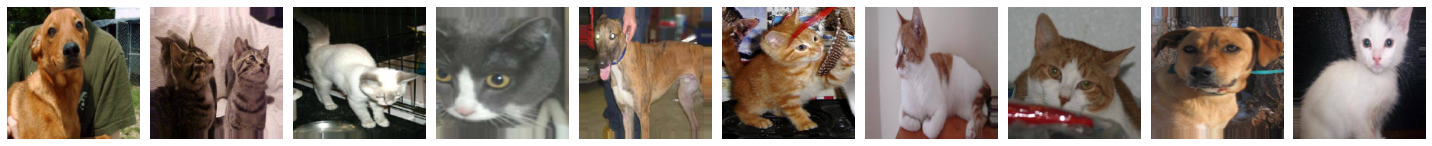

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [6]:
plotImg(imgs)
print(labels)

In [7]:
training_set.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [8]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
 layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [9]:
# useful for getting number of classes
folders = glob('../input/cat-and-dog/training_set/training_set/*')

In [10]:
print(folders)

['../input/cat-and-dog/training_set/training_set/dogs', '../input/cat-and-dog/training_set/training_set/cats']


In [11]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
251/251 [==============================] - 123s 489ms/step - loss: 0.3229 - accuracy: 0.8625 - val_loss: 0.2335 - val_accuracy: 0.9006
Epoch 2/5
251/251 [==============================] - 114s 454ms/step - loss: 0.2086 - accuracy: 0.9141 - val_loss: 0.1909 - val_accuracy: 0.9244
Epoch 3/5
251/251 [==============================] - 116s 460ms/step - loss: 0.1697 - accuracy: 0.9313 - val_loss: 0.2018 - val_accuracy: 0.9283
Epoch 4/5
251/251 [==============================] - 114s 455ms/step - loss: 0.1691 - accuracy: 0.9299 - val_loss: 0.2007 - val_accuracy: 0.9343
Epoch 5/5
251/251 [==============================] - 114s 455ms/step - loss: 0.1602 - accuracy: 0.9383 - val_loss: 0.2158 - val_accuracy: 0.9259


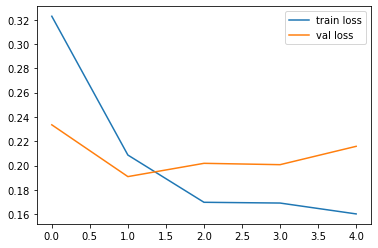

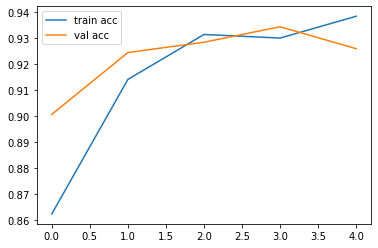

<Figure size 432x288 with 0 Axes>

In [14]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [15]:
import tensorflow as tf

from keras.models import load_model

model.save('transfermodel.h5')

In [ ]:
from keras.models import load_model
import cv2
import numpy as np
im = cv2.imread('../input/thisistest/cat.jpg')
#im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (256, 256)).astype(np.float32)
im = np.expand_dims(im, axis = 0)/255

classes = model.predict(im)

print (classes)

In [8]:
from keras.models import load_model
import cv2
import numpy as np
model = load_model('../input/modeltransfer/transfermodel.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('../input/thisistest/cat.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

classes = model.predict(img)

print(classes[0][1])

1.0
